In [3]:
# Importing all basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing all the libraries for feature engineering and model building
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from scipy.stats import randint

In [7]:

df = pd.read_csv(r"C:\Users\sadhi\Downloads\UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
df.shape

(30000, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [12]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [13]:
df[df.duplicated(keep=False)]
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [14]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [15]:
def valueCounts(df):
    for col in df.columns:
        print(df[col].value_counts())

In [16]:
df_SEM = df[["SEX", "EDUCATION", "MARRIAGE"]]
valueCounts(df_SEM)

SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


**Education**

> 1 = graduate school; 2 = university; 3 = high school; 4 = others

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [17]:
df['EDUCATION'] = df['EDUCATION'].replace([5, 6, 0], 4)

**Marriage**


> 1 = married; 2 = single; 3 = others

We have few values for 0, which are not determined . So I am adding them in Others category.

In [18]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3

In [19]:
df_pay_status = df[['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
valueCounts(df_pay_status)

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64
PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64
PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64
PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64
PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64
PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64


In [20]:
df.rename(columns={'default.payment.next.month':'IsDefaulter'}, inplace=True)

<Axes: xlabel='IsDefaulter', ylabel='count'>

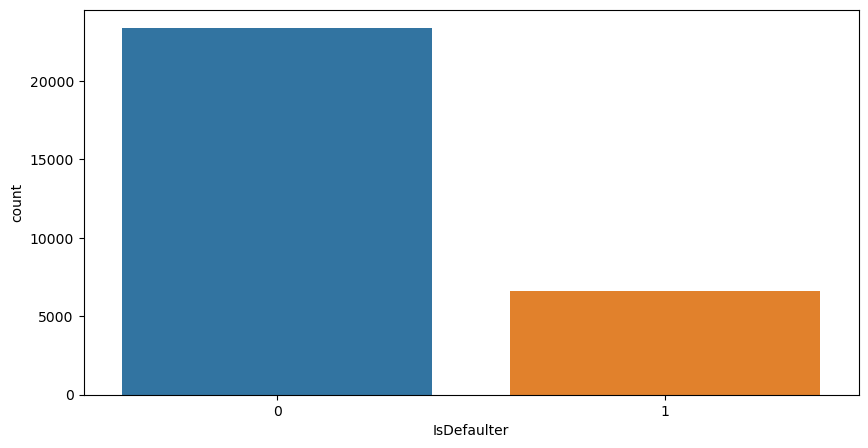

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [22]:
df['IsDefaulter'].value_counts(normalize=True)*100

IsDefaulter
0    77.88
1    22.12
Name: proportion, dtype: float64

As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.




## **Independent Variable:**

### **Categorical  Features**

We have few categorical features in our dataset. Let'Check how they are related with out target class.

**SEX**



*   1 - Male
*   2 - Female


In [23]:
df['SEX'].value_counts(normalize=True)

SEX
2    0.603733
1    0.396267
Name: proportion, dtype: float64

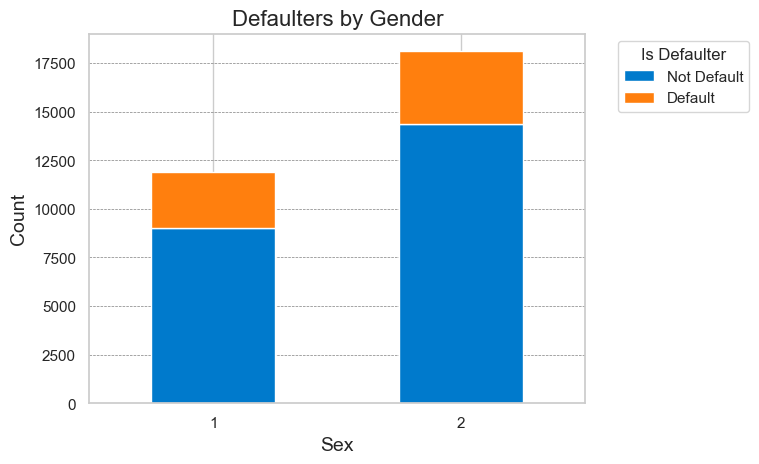

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab to get the counts of 'IsDefaulter' for each 'SEX' category
gender_crosstab = pd.crosstab(df['SEX'], df['IsDefaulter'])

# Set a color palette
colors = ["#007acc", "#ff7f0e"]

# Create a stacked bar plot
sns.set(style="whitegrid")
ax = gender_crosstab.plot(kind='bar', stacked=True, color=colors)

# Customize the plot
ax.set_title('Defaulters by Gender', fontsize=16)
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Customize the legend and move it outside
legend_labels = ['Not Default', 'Default']
legend = plt.legend(legend_labels, title='Is Defaulter', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines
ax.yaxis.grid(which="both", color='gray', linestyle='--', linewidth=0.5)

plt.show()

In [25]:
gender_crosstab = pd.crosstab(df['SEX'], df['IsDefaulter'], normalize='index')
gender_crosstab

IsDefaulter,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763


**Plotting our categorical features**

In [26]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']
df_cat

,SEX,EDUCATION,MARRIAGE,Defaulter
0,2,2,1,1
1,2,2,2,1
2,2,2,2,0
3,2,2,1,0
4,1,2,1,0
...,...,...,...,...
29995,1,3,1,0
29996,1,3,2,0
29997,1,2,2,1
29998,1,3,1,1


In [27]:
# df_cat=df_cat[['EDUCATION','MARRIAGE','SEX','Defaulter']].astype('str')

In [28]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [29]:
df_cat

,SEX,EDUCATION,MARRIAGE,Defaulter
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0
...,...,...,...,...
29995,MALE,high school,married,0
29996,MALE,high school,single,0
29997,MALE,university,single,1
29998,MALE,high school,married,1


<Axes: xlabel='SEX', ylabel='count'>

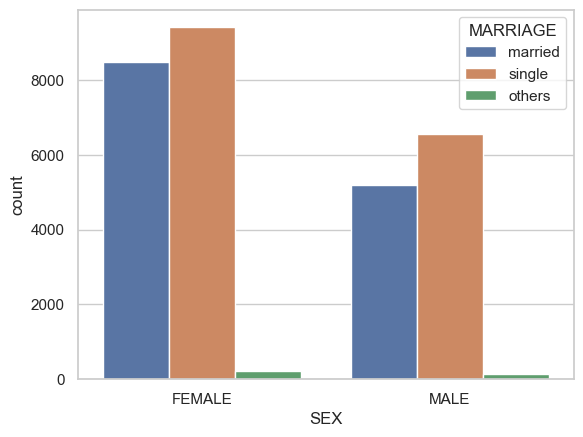

In [30]:
sns.countplot(data = df_cat, x = 'SEX', hue = 'MARRIAGE')

In [31]:
df_cat["SEX"].value_counts(normalize=True)

SEX
FEMALE    0.603733
MALE      0.396267
Name: proportion, dtype: float64

In [32]:
pd.crosstab(df_cat["SEX"], df_cat["Defaulter"], normalize="index")

Defaulter,0,1
SEX,,
FEMALE,0.792237,0.207763
MALE,0.758328,0.241672


In [33]:
df_cat.groupby(['Defaulter', 'EDUCATION'],as_index=False)['EDUCATION'].count()

,Defaulter,EDUCATION
0,0,8549
1,0,3680
2,0,435
3,0,10700
4,1,2036
5,1,1237
6,1,33
7,1,3330


In [34]:
df_cat[['Defaulter', 'EDUCATION']].value_counts()

Defaulter  EDUCATION      
0          university         10700
           graduate school     8549
           high school         3680
1          university          3330
           graduate school     2036
           high school         1237
0          others               435
1          others                33
Name: count, dtype: int64

In [35]:
df['LIMIT_BAL'].max()

1000000.0

In [36]:
df['LIMIT_BAL'].min()

10000.0

In [37]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [38]:
df[(df['LIMIT_BAL'] >= 600000) & (df['IsDefaulter'] == 1)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
451,452,600000.0,1,1,1,53,2,2,0,0,...,447130.0,440982.0,434715.0,0.0,18000.0,16000.0,16000.0,21000.0,20000.0,1
527,528,620000.0,2,2,1,45,2,2,0,0,...,163781.0,167159.0,170894.0,0.0,6200.0,6000.0,6000.0,6500.0,6000.0,1
3402,3403,710000.0,2,2,1,40,-2,-2,-2,-1,...,1004.0,854.0,8626.0,0.0,0.0,1004.0,0.0,8000.0,5000.0,1
10895,10896,630000.0,2,1,2,29,0,0,0,0,...,435019.0,329476.0,338557.0,15868.0,12371.0,26454.0,8510.0,11039.0,5390.0,1
13883,13884,740000.0,2,2,1,35,2,-1,-1,-1,...,15713.0,8988.0,25449.0,8229.0,1487.0,15754.0,9012.0,25596.0,7003.0,1
14083,14084,600000.0,1,2,1,50,0,0,0,0,...,241033.0,246081.0,250971.0,8773.0,10561.0,8629.0,8934.0,8984.0,9306.0,1
15593,15594,600000.0,1,1,1,53,2,2,2,0,...,469703.0,447130.0,440982.0,17000.0,0.0,18000.0,16000.0,16000.0,21000.0,1
19251,19252,680000.0,2,1,2,30,0,0,-1,-1,...,25094.0,7327.0,167520.0,0.0,10296.0,25219.0,7341.0,163123.0,7267.0,1
26921,26922,720000.0,1,1,1,40,0,0,0,0,...,148956.0,135217.0,85300.0,8500.0,6000.0,6000.0,5237.0,3000.0,8961.0,1


<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

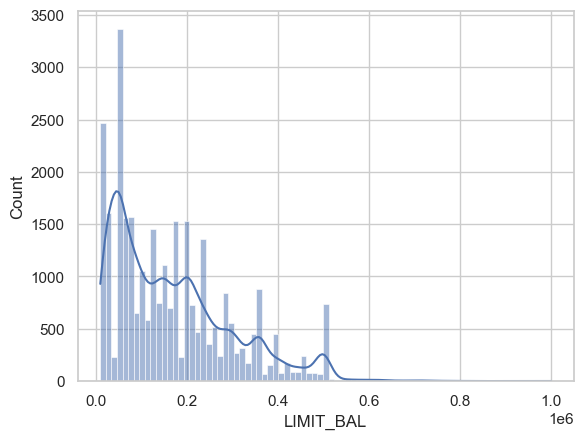

In [39]:
sns.histplot(df['LIMIT_BAL'], kde = True)

In [40]:
df['LIMIT_BAL'].skew()

0.992866960519544

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

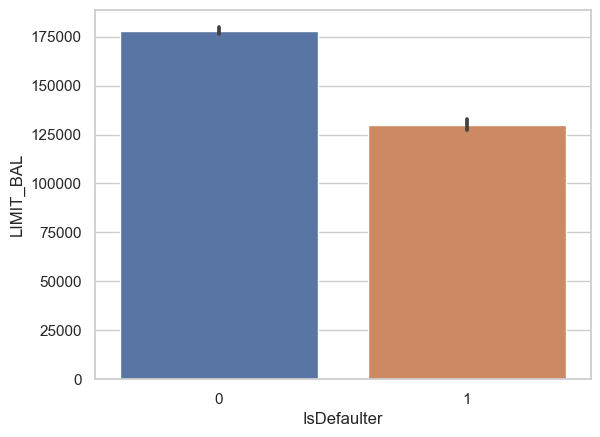

In [41]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

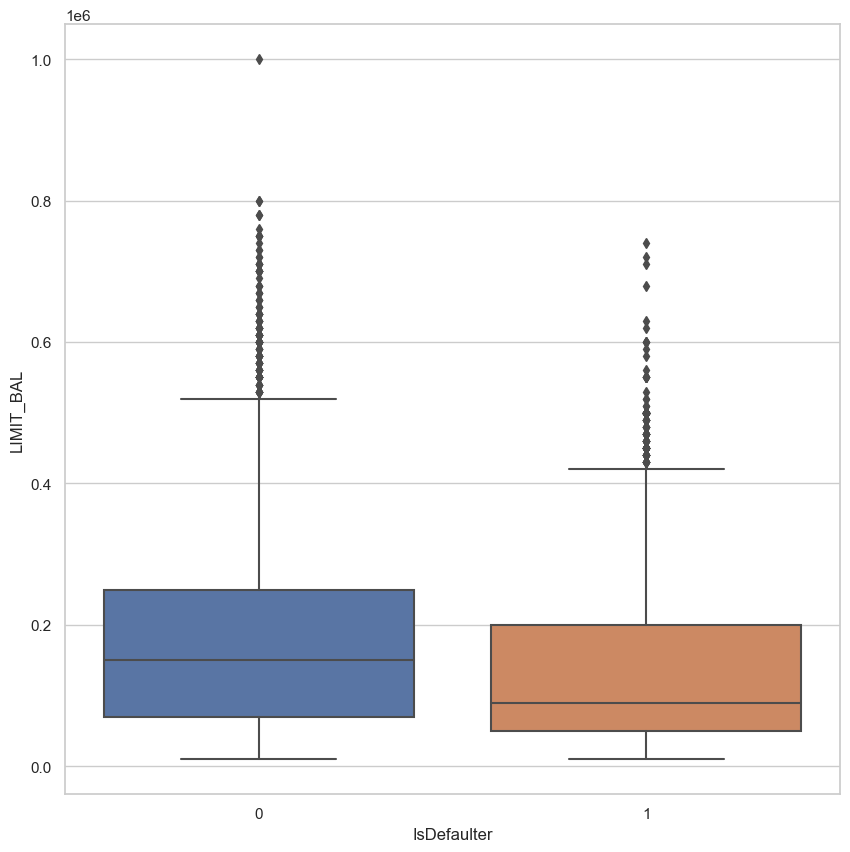

In [42]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

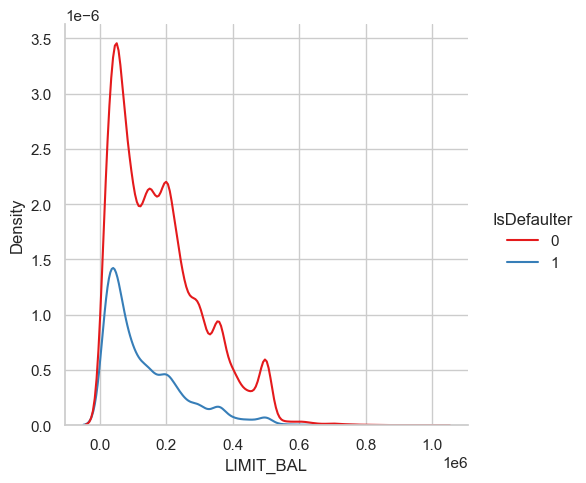

In [41]:
sns.displot(data=df, x = 'LIMIT_BAL', hue = 'IsDefaulter', kind='kde')

##### The distribution is right skewed and the above plot explains that limit balance is a good feature to explain our targeT feature as the distribution is no overlapping.

In [42]:
df.groupby(['IsDefaulter'])['AGE'].mean()

IsDefaulter
0    35.421041
1    35.723529
Name: AGE, dtype: float64

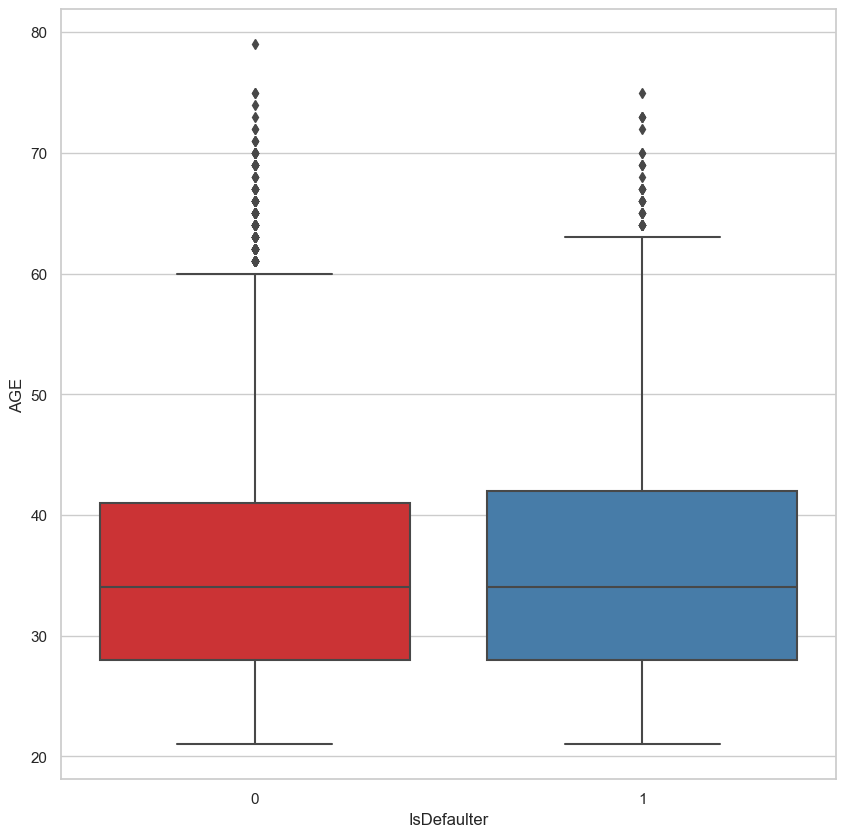

In [43]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

In [44]:
#renaming columns 
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

**Bill Amount**

In [45]:
bill_amnt_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]

In [46]:
bill_amnt_df

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
ID,,,,,,
1,3913.0,3102.0,689.0,0.0,0.0,0.0
2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29996,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0
29997,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29998,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0


<Axes: xlabel='BILL_AMT_SEPT', ylabel='Count'>

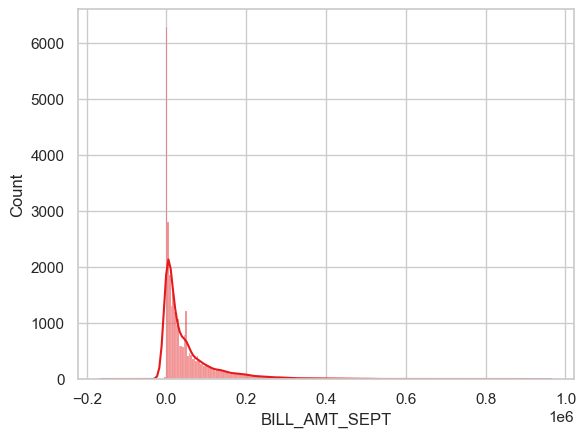

In [47]:
sns.histplot(df['BILL_AMT_SEPT'], kde= True)

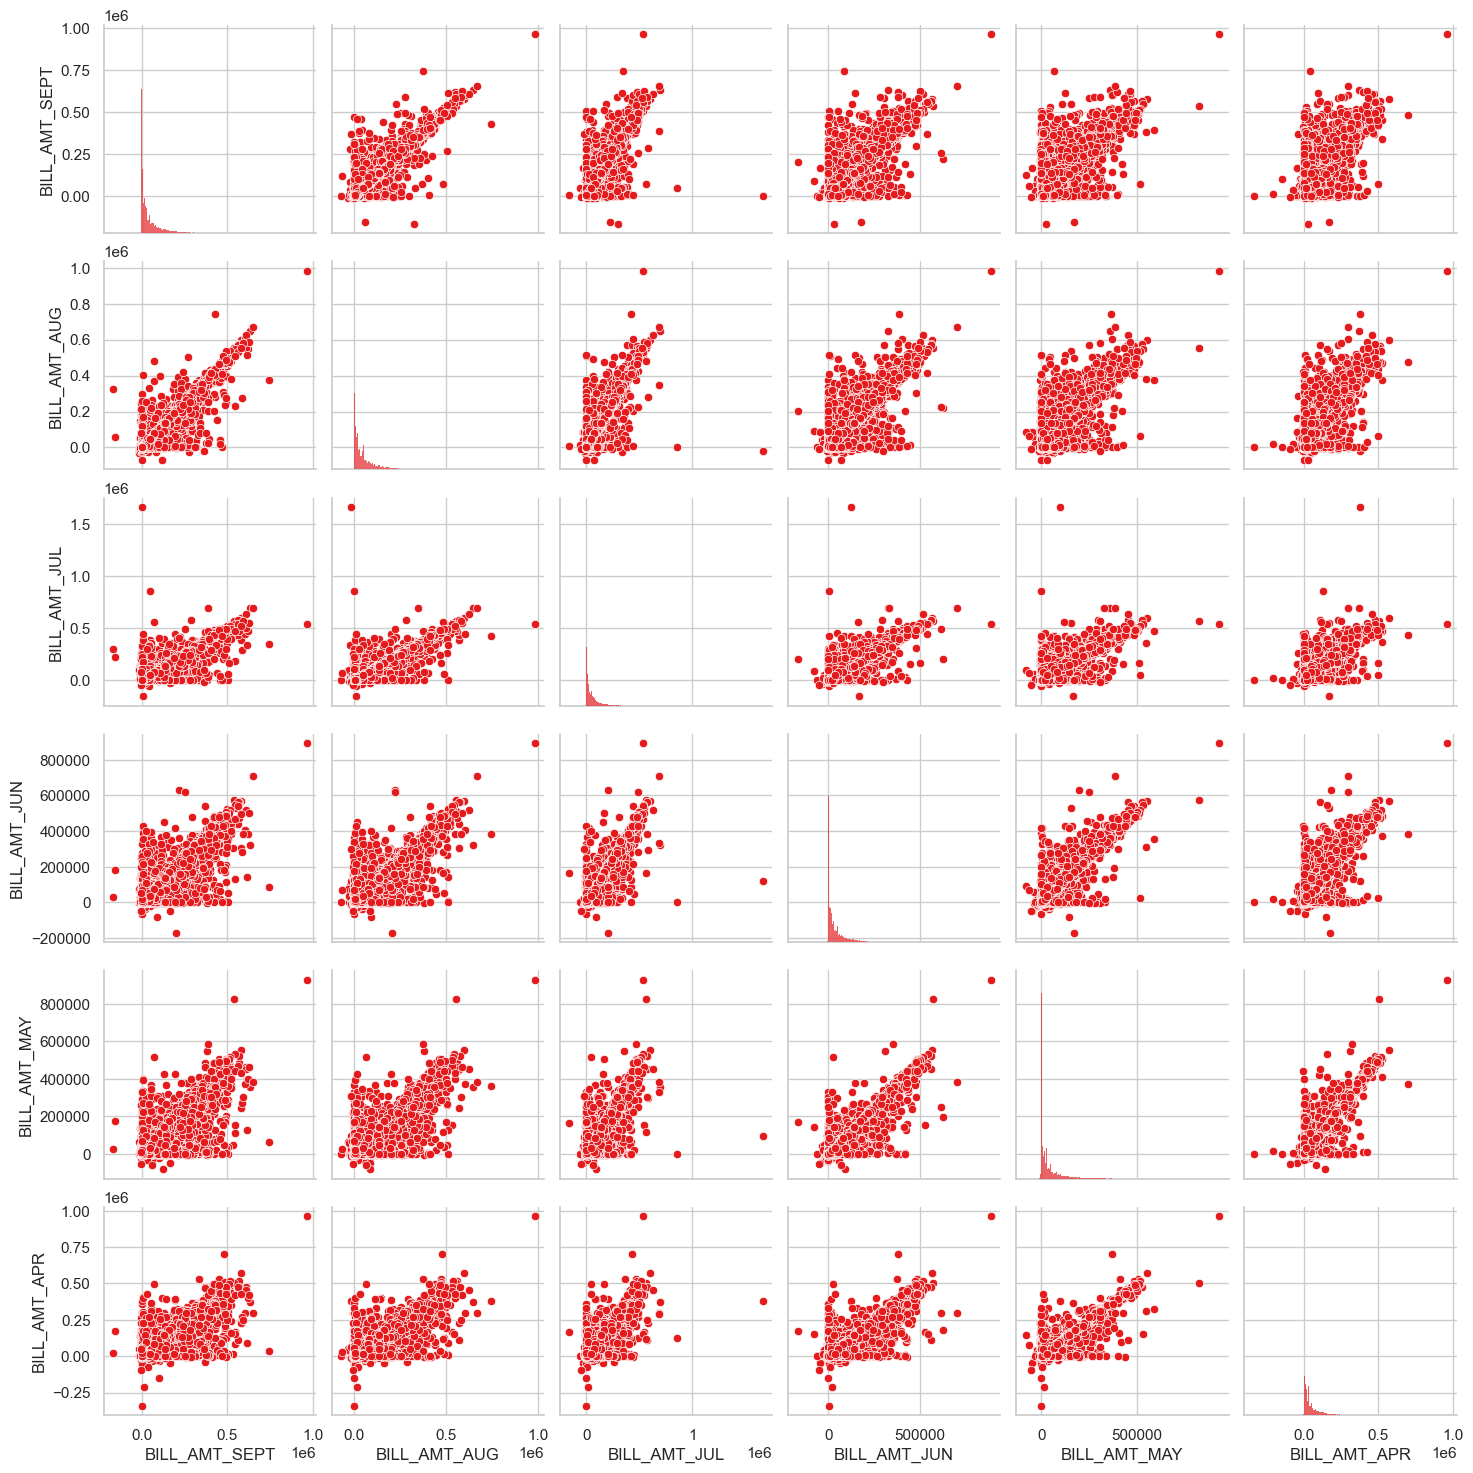

In [48]:
sns.pairplot(data = bill_amnt_df)

In [49]:
bill_amnt_df.corr()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
BILL_AMT_SEPT,1.000000,0.951457,0.892220,0.860196,0.829688,0.802547
BILL_AMT_AUG,0.951457,1.000000,0.928287,0.892424,0.859704,0.831506
BILL_AMT_JUL,0.892220,0.928287,1.000000,0.923929,0.883849,0.853245
BILL_AMT_JUN,0.860196,0.892424,0.923929,1.000000,0.940103,0.900891
BILL_AMT_MAY,0.829688,0.859704,0.883849,0.940103,1.000000,0.946170
BILL_AMT_APR,0.802547,0.831506,0.853245,0.900891,0.946170,1.000000


**History payment status**

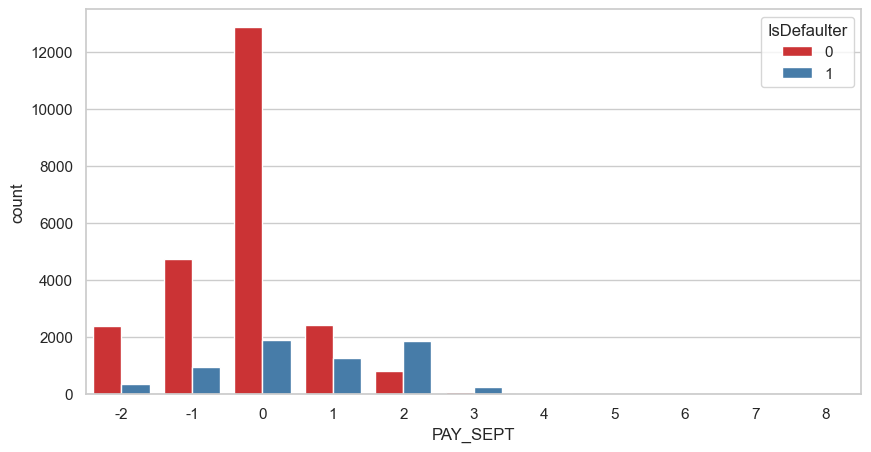

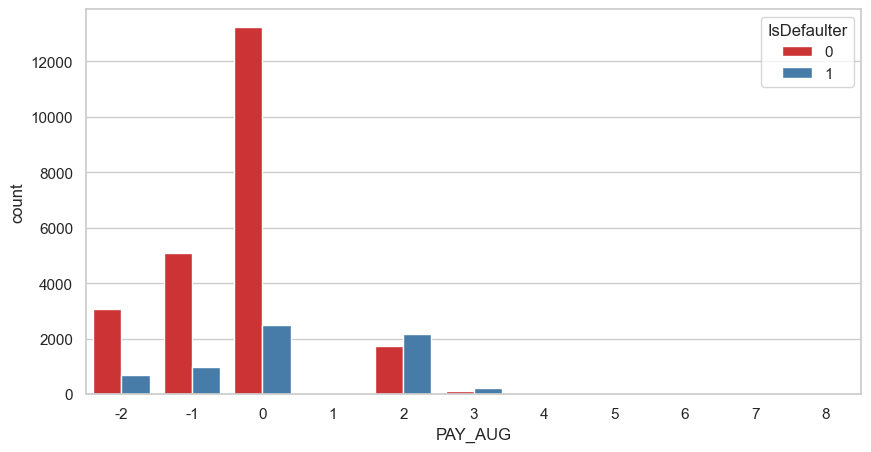

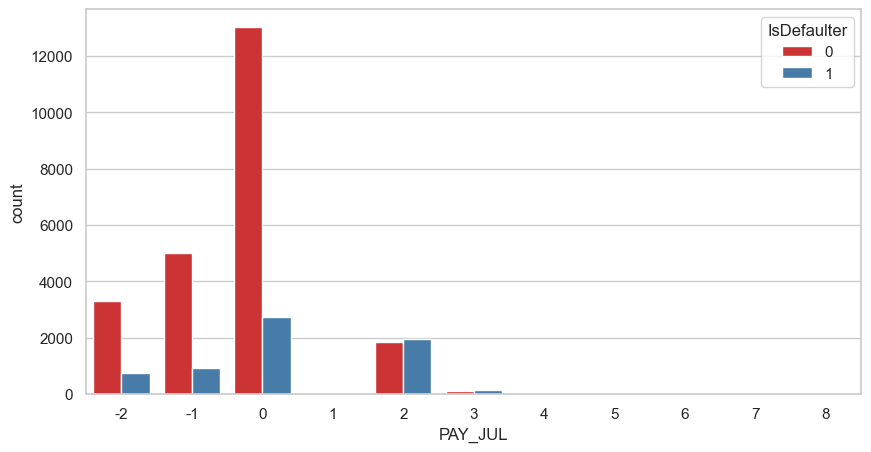

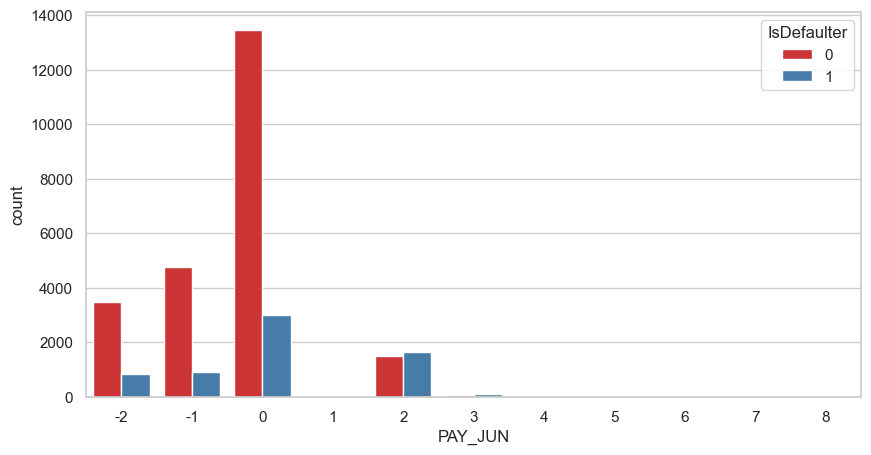

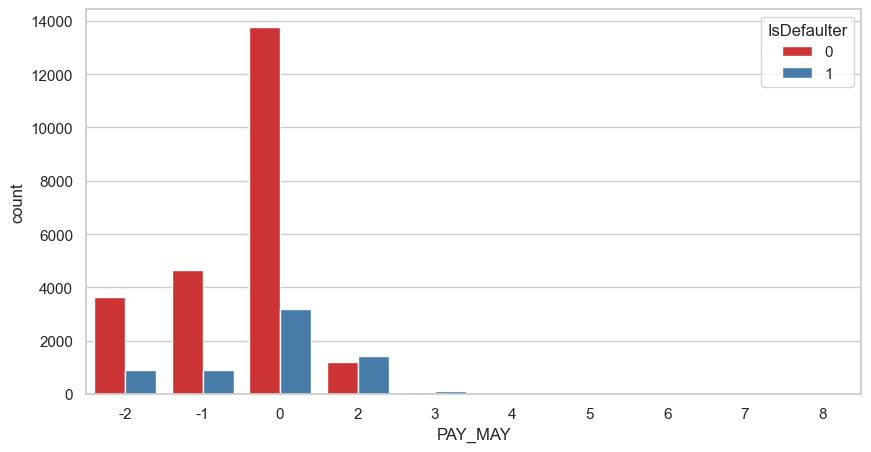

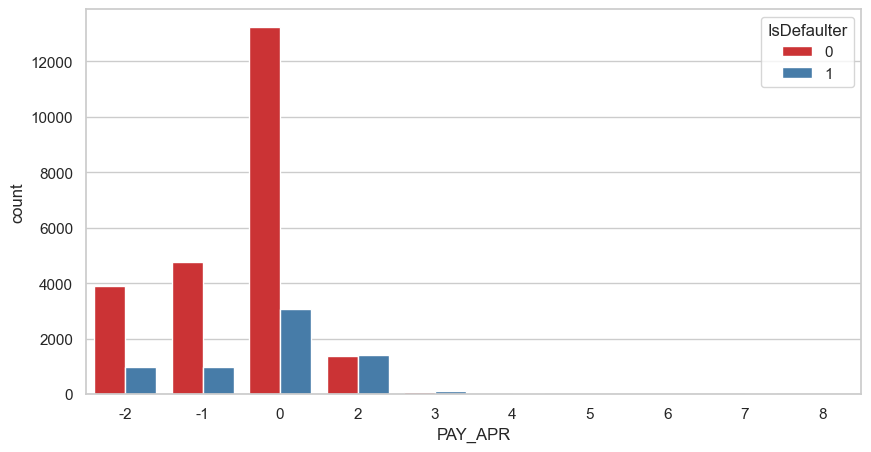

In [50]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

### similarly you can do analysis on numerical features w.r.t. target variables

In [51]:
X = df.drop(['IsDefaulter'],axis=1)
y = df['IsDefaulter']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23972, 23), (5993, 23), (23972,), (5993,))

In [54]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train )

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 23972
Resampled dataset shape 36298


<Axes: xlabel='IsDefaulter', ylabel='count'>

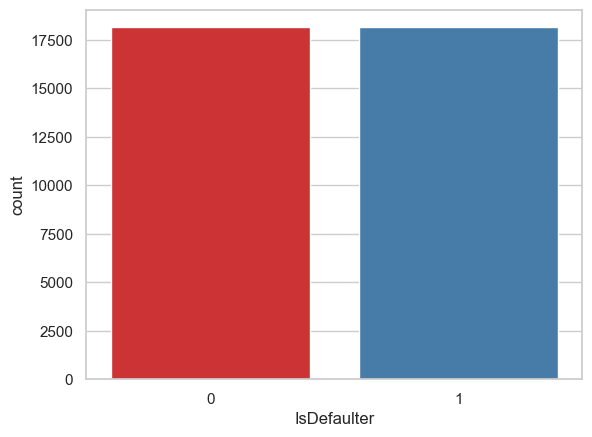

In [55]:
#checking wether the datsets are balanced
smote_df = X_smote.copy()
smote_df['IsDefaulter'] = y_smote
sns.countplot(x='IsDefaulter', data = smote_df)

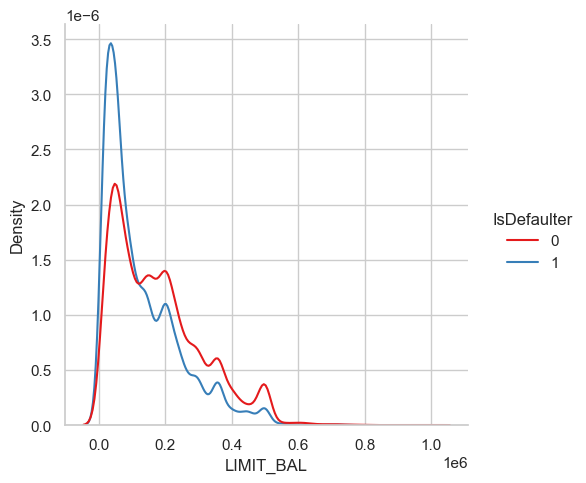

In [56]:
sns.displot(data=smote_df, x = 'LIMIT_BAL', hue = 'IsDefaulter', kind='kde')

In [57]:
X_smote.shape, y_smote.shape

((36298, 23), (36298,))

### Creating  a pipeline for preprocessing steps like encoding and scaling

In [58]:
#1. It should create marital status - (married male, married female, single male.....)
#2. drop both the columns gender, marriage
#3. pay scales drop certain features and combine certain features 
#4. add column called dues (bill - payment)
def create_custom_pipeline(categorical_cols, numerical_cols, scaling_method=None):
    # Define transformers for categorical and numerical columns
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False, drop="first", handle_unknown='ignore'))])

    if scaling_method:
        if scaling_method == 'standard':
            numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        elif scaling_method == 'robust':
            numerical_transformer = Pipeline(steps=[('scaler', RobustScaler())])
        elif scaling_method == 'minmax':
            numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    else:
        numerical_transformer = "passthrough"

    # Specify which columns to apply each transformer to
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Include the preprocessor in your main pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    return pipeline

In [59]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
numerical_cols = [col for col in X_smote.columns if col not in categorical_cols]

# Applying the pipeine to categorical and numerical columns if required
pipeline = create_custom_pipeline(categorical_cols, numerical_cols,scaling_method='robust')


# Fit and transform the data
X_preprocessed_train = pipeline.fit_transform(X_smote)
X_preprocessed_test = pipeline.transform(X_test)

In [70]:
def plot_confusion_matrix(y_true, y_pred, labels = ['Not Defaulter', 'Defaulter']):
    """
    Plots a confusion matrix using seaborn.
    
    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        labels: List of class labels.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
    # Add labels and title
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    
    # Display the plot
    plt.show()

In [69]:
def evaluate_model(model, X_train, X_test, y_train, y_test, hyperparameters={}):
    """
    Evaluate a machine learning model with hyperparameters.

    Parameters:
    - model: The machine learning model to be trained and evaluated.
    - X_train: Features of the training set.
    - X_test: Features of the testing set.
    - y_train: Target labels of the training set.
    - y_test: Target labels of the testing set.
    - hyperparameters: Dictionary of hyperparameters for the model.

    Returns:
    - A dictionary containing evaluation metrics for both training and testing sets, as well as predicted labels.
    """
    # Initialize and configure the model with hyperparameters
    model.set_params(**hyperparameters)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_score = roc_auc_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_score = roc_auc_score(y_test, y_test_pred)

    # Create a dictionary to store the results
    evaluation_results = {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1 Score': train_f1,
        'Train ROC AUC Score': train_roc_score,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1,
        'Test ROC AUC Score': test_roc_score,
        'y_pred_train': y_train_pred,
        'y_pred_test': y_test_pred,
        'trained_model':model
    }

    return evaluation_results

### Building a Logistic Regression Model

In [71]:
logistic_model = LogisticRegression()
results_lr = evaluate_model(logistic_model,X_preprocessed_train, X_preprocessed_test, y_smote, y_test)
results_lr

{'Train Accuracy': 0.7529340459529451,
 'Train Precision': 0.7899324196298869,
 'Train Recall': 0.6891288776241116,
 'Train F1 Score': 0.7360955800129481,
 'Train ROC AUC Score': 0.7529340459529451,
 'Test Accuracy': 0.7493742699816452,
 'Test Precision': 0.4424083769633508,
 'Test Recall': 0.5098039215686274,
 'Test F1 Score': 0.47372109320252276,
 'Test ROC AUC Score': 0.6636227664410526,
 'y_pred_train': array([0, 1, 1, ..., 1, 1, 0], dtype=int64),
 'y_pred_test': array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 'trained_model': LogisticRegression()}

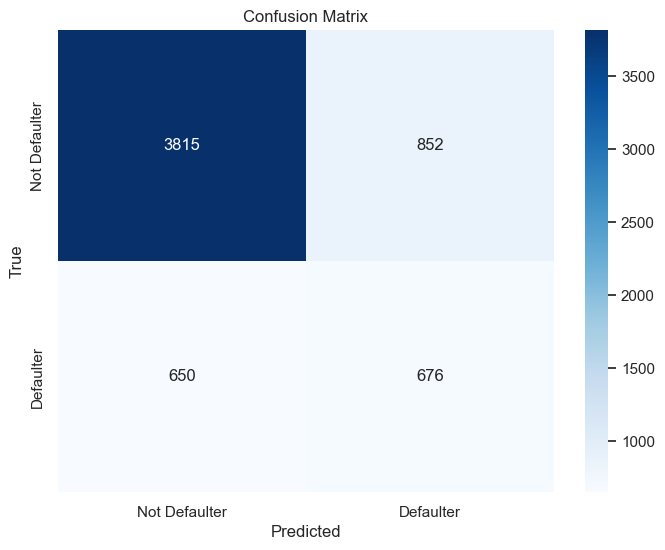

In [72]:
plot_confusion_matrix(y_test, results_lr['y_pred_test'])

### Building a Random Forest Model

In [ ]:
Random_forest = RandomForestClassifier()
results_rf = evaluate_model(Random_forest,X_smote, X_test, y_smote, y_test)
results_rf

In [ ]:
plot_confusion_matrix(y_test, results_rf['y_pred_test'])

### Hyper Parameter Tuning for Logistic Regression

In [ ]:
pipeline = create_custom_pipeline(categorical_cols, numerical_cols,scaling_method='robust')

# Fit and transform the data
X_preprocessed_train = pipeline.fit_transform(X_smote)
X_preprocessed_test = pipeline.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#Applying GridSeachCV method

param_grid = {'penalty':['l1','l2','elasticnet', None], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' :['lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4, cv = 5)
grid_lr_clf.fit(X_preprocessed_train, y_smote)
optimized_clf = grid_lr_clf.best_estimator_
optimized_params = grid_lr_clf.best_params_

In [ ]:
#Applying RandomSearchCV method


param_grid = {'penalty':['l1','l2','elasticnet', None], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
random_lr_clf = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, scoring='accuracy', n_jobs=-1, verbose=4, cv=5, n_iter=10)
random_lr_clf.fit(X_preprocessed_train, y_smote)
optimized_clf = random_lr_clf.best_estimator_
optimized_params = random_lr_clf.best_params_

In [ ]:
#Applying Hyperparameter tuning  on Logistic Regression

logistic_model = LogisticRegression()
hp = optimized_params
results_lrh = evaluate_model(model=logistic_model, X_train=X_preprocessed_train, X_test=X_preprocessed_test, y_train=y_smote, y_test=y_test, hyperparameters=hp)
results_lrh

In [ ]:
plot_confusion_matrix(y_test, results_lrh['y_pred_test'])

### Hyper Parameter Tuning for Random Forest

In [ ]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_depth': randint(1, 20),      # Maximum depth of each tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting
    'bootstrap': [True, False],  # Whether or not to use bootstrap samples
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist,
    n_iter=10,  # Number of parameter combinations to try
    scoring='accuracy',  # Choose an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Set to 1 for progress updates
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your training data
random_search.fit(X_smote, y_smote)

# Get the best hyperparameters
RF_best_params = random_search.best_params_

In [ ]:
RF_best_params = {'min_samples_split':9,'criterion': 'entropy','max_depth': 19,'max_features': 'sqrt','min_samples_leaf': 1,'n_jobs':-1}

In [ ]:
#Applying Hyperparameter tuning  on Random Forest

random_forest_model = RandomForestClassifier(random_state=42)
hyper_parameter = RF_best_params
results_rfh = evaluate_model(model=random_forest_model, X_train=X_smote, X_test=X_test, y_train=y_smote, y_test=y_test, hyperparameters=hyper_parameter)
results_rfh

In [ ]:
plot_confusion_matrix(y_test, results_rfh['y_pred_test'])

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, results_lr['y_pred_test'])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, results_rfh['y_pred_test'])
roc_auc2 = auc(fpr2, tpr2)

# Repeat the above steps for model3 and its ROC curve and AUC score
plt.figure(figsize=(10, 6))

plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='r', lw=2, label=f'Random Forest (AUC = {roc_auc2:.2f})')

# Plot the ROC curve for model3 with its AUC score

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [73]:
results_lr['trained_model']

LogisticRegression()

In [74]:
import dill
data = {"model": results_lr['trained_model'], "pipeline":pipeline}   # change the model and pipeline as required
with open ('model_pipeline_object.joblib', 'wb') as file:
    dill.dump(data, file)